## Final Video Polynomial Examples

- Ok, so we have this long-running polynomial example throughout the video
- The sample and data and orders etc don't have to be exaclty the same throughout, but it would be nice if they were
- Let me first see if the same samples etc can make the points/plots I need in each section, if that works great, if not I want to go ahead and make the needed adjustments before getting into manim land
- Bias/varaince section at the end might be a little extra tricky!
- Ah yep I think i want to try the new numpy API?

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from IPython import display
import pandas as pd
from matplotlib import cm
from numpy.polynomial import Legendre
import scipy.special

def fit_legendre_pinv(x_train, y_train, degree, x_min=-2, x_max=2):
    """Fit Legendre polynomial using pseudoinverse"""
    # Rescale x to [-1, 1]
    x_scaled = 2 * (x_train - x_min) / (x_max - x_min) - 1
    
    feature_degrees = np.arange(degree + 1)[:, None]
    X_train_poly = scipy.special.eval_legendre(feature_degrees, x_scaled).T
    beta_hat = np.linalg.pinv(X_train_poly) @ y_train
    return beta_hat

def eval_legendre_poly(beta, x, degree, x_min=-2, x_max=2):
    """Evaluate Legendre polynomial with given coefficients"""
    # Rescale x to [-1, 1]
    x_scaled = 2 * (x - x_min) / (x_max - x_min) - 1
    
    feature_degrees = np.arange(degree + 1)[:, None]
    X_poly = scipy.special.eval_legendre(feature_degrees, x_scaled).T
    return X_poly @ beta

In [2]:
random_seed=428
n_points=10
noise_level=0.2

In [3]:
def f(x): return 0.5*(x**2)
# def f(x): return 0.5*(x**4-3*x**2) #This this for a minute. 
# def f(x): return np.add(2.0 * x, np.cos(x * 25)) #[:, 0]


def get_noisy_data(n_points=10, noise_level=0.2, random_seed=428):
    np.random.seed(random_seed) 
    x=np.random.uniform(-2, 2, n_points)
    y=f(x)+noise_level*np.random.randn(n_points)
    return x,y

all_x = np.linspace(-2, 2, 128)
all_y = f(all_x)

n_train_points=int(np.floor(n_points*0.5))
n_test_points=n_points-n_train_points
x,y=get_noisy_data(n_points, noise_level, random_seed)
                   
x_train=x[:n_train_points]
y_train=y[:n_train_points]
x_test=x[n_train_points:]
y_test=y[n_train_points:]

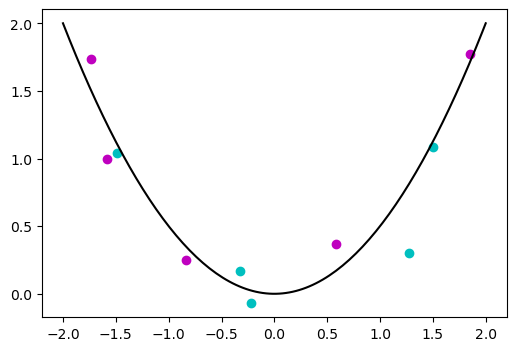

In [4]:
fig=plt.figure(0, (6, 4))
plt.plot(all_x, all_y, c='k')
plt.scatter(x_train, y_train, c='c')
plt.scatter(x_test, y_test, c='m')
# plt.ylim([-0.5, 2])

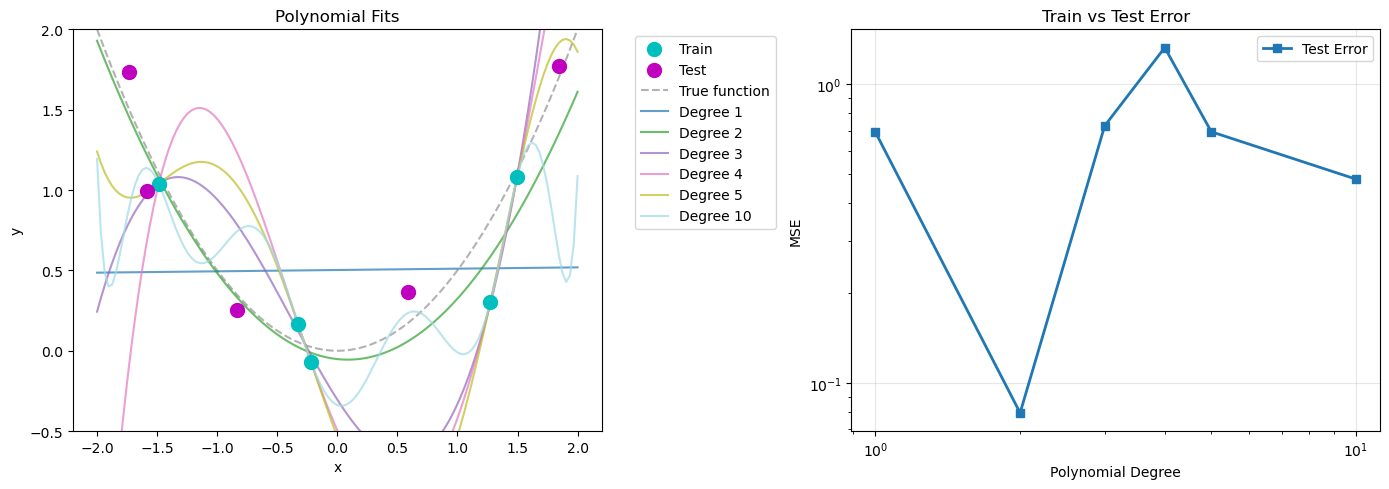

Degree   1: Train MSE = 0.221350, Test MSE = 0.691636
Degree   2: Train MSE = 0.031825, Test MSE = 0.079449
Degree   3: Train MSE = 0.000803, Test MSE = 0.727023
Degree   4: Train MSE = 0.000000, Test MSE = 1.328535
Degree   5: Train MSE = 0.000000, Test MSE = 0.694120
Degree  10: Train MSE = 0.000000, Test MSE = 0.481703


In [5]:
degrees = [1, 2, 3, 4, 5, 10] # 6, 7, 8, 9, 10] #6, 7, 8, 10, 20, 30, 50, 100]
train_errors = []
test_errors = []

# Get colormap
colors = cm.tab20(np.linspace(0, 1, len(degrees)))

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left subplot: fits
ax1.scatter(x_train, y_train, c='c', s=100, label='Train', zorder=10)
ax1.scatter(x_test, y_test, c='m', s=100, label='Test', zorder=10)
ax1.plot(all_x, all_y, 'k--', alpha=0.3, label='True function')

for i, degree in enumerate(degrees):
    # Fit polynomial
    beta_hat = fit_legendre_pinv(x_train, y_train, degree)
    all_y_fit = eval_legendre_poly(beta_hat, all_x, degree)
    
    y_train_pred = eval_legendre_poly(beta_hat, x_train, degree)
    y_test_pred = eval_legendre_poly(beta_hat, x_test, degree)
    all_y_fit = eval_legendre_poly(beta_hat, all_x, degree)

    # Plot fit
    ax1.plot(all_x, all_y_fit, color=colors[i], label=f'Degree {degree}', alpha=0.7)
    
    # Calculate errors
    train_error = np.mean((y_train - y_train_pred)**2)
    test_error = np.mean((y_test - y_test_pred)**2)
    train_errors.append(train_error)
    test_errors.append(test_error)

ax1.set_ylim([-0.5, 2])
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Polynomial Fits')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Right subplot: errors
# ax2.plot(degrees, train_errors, 'o-', label='Train Error', linewidth=2)
ax2.plot(degrees, test_errors, 's-', label='Test Error', linewidth=2)
ax2.set_xlabel('Polynomial Degree')
ax2.set_ylabel('MSE')
ax2.set_title('Train vs Test Error')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print errors
for degree, train_err, test_err in zip(degrees, train_errors, test_errors):
    print(f"Degree {degree:3d}: Train MSE = {train_err:.6f}, Test MSE = {test_err:.6f}")

In [6]:
test_errors

[0.6916356215529327,
 0.07944900430027538,
 0.7270232226462813,
 1.3285352412911031,
 0.6941201700345376,
 0.48170322287181444]

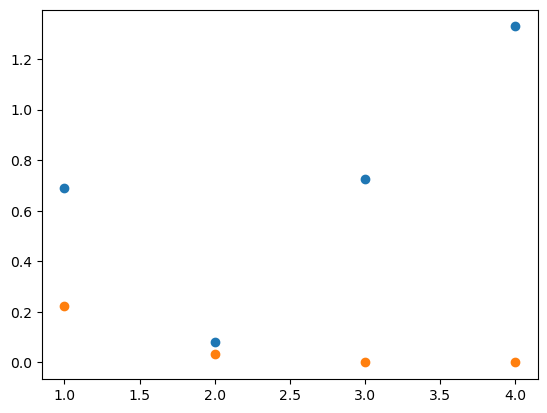

In [7]:
plt.scatter(degrees[:4], test_errors[:4])
plt.scatter(degrees[:4], train_errors[:4])

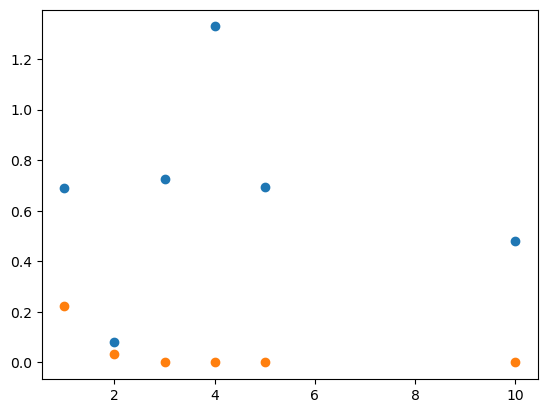

In [8]:
plt.scatter(degrees[:8], test_errors[:8])
plt.scatter(degrees[:8], train_errors[:8])

(0.0, 5.0)

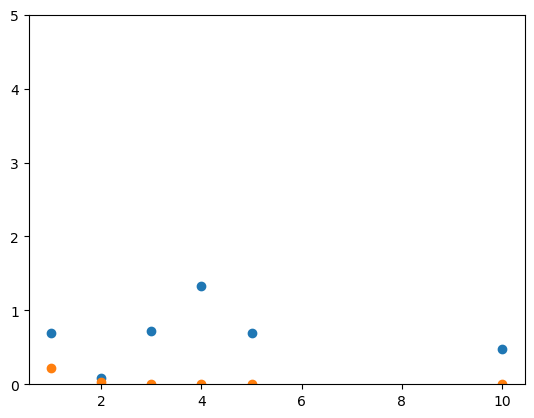

In [9]:
plt.scatter(degrees, test_errors)
plt.scatter(degrees, train_errors)
plt.ylim([0,5])

## Multiple Solutions
- Ok, let's try GD as a way to find lots o' solutions
- Maybe I pickle these? Don't super want to run all of these in manim...

In [10]:
x_train_tensor = torch.FloatTensor(x_train).reshape(-1, 1)
y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)
x_test_tensor = torch.FloatTensor(x_test).reshape(-1, 1)
y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1)

In [11]:
import torch
import torch.nn as optim

def fit_polynomial_gd(x_tensor, y_tensor, degree, lr=0.01, steps=10000, init_scale=1.0, seed=None):
    """Fit polynomial using gradient descent with custom initialization"""
    if seed is not None:
        torch.manual_seed(seed)
    
    # Initialize coefficients randomly as a Parameter (leaf tensor)
    coeffs = torch.randn(degree + 1, 1) * init_scale
    coeffs = torch.nn.Parameter(coeffs)
    
    # Create Vandermonde matrix
    X = torch.cat([x_tensor**i for i in range(degree + 1)], dim=1)
    
    # Optimizer
    optimizer = torch.optim.Adam([coeffs], lr=lr)
    
    # Training loop
    for step in range(steps):
        optimizer.zero_grad()
        
        # Predictions
        y_pred = X @ coeffs
        
        # MSE loss
        loss = torch.mean((y_pred - y_tensor)**2)
        
        loss.backward()
        optimizer.step()
        
        # Print progress occasionally
        # if step % 2000 == 0:
        #     print(f"  Step {step}, Loss: {loss.item():.6f}")
    
    return coeffs.detach().numpy().flatten()

def polyval_torch_coeffs(coeffs, x):
    """Evaluate polynomial with coefficients in increasing degree order"""
    result = np.zeros_like(x)
    for i, c in enumerate(coeffs):
        result += c * (x ** i)
    return result

# Experiment with different initializations
degree = 5
n_inits = 100

# Store results
all_coeffs = []
all_fits=[]
train_errors = []
test_errors = []
colors = cm.tab10(np.linspace(0, 1, n_inits))

print(f"\nFitting degree {degree} polynomial with gradient descent:")
print(f"Training points: {n_train_points}, Parameters: {degree + 1}\n")

for i in tqdm(range(n_inits)):
    # print(f"Initialization {i+1}:")
    
    # Fit with different random initialization
    coeffs = fit_polynomial_gd(
        x_train_tensor, y_train_tensor, 
        degree, 
        lr=0.001, 
        steps=30000,
        init_scale=1.0,
        seed=i
    )
    
    # Plot the fit
    y_fit = polyval_torch_coeffs(coeffs, all_x)
   
    # Calculate errors
    y_train_pred = polyval_torch_coeffs(coeffs, x_train)
    y_test_pred = polyval_torch_coeffs(coeffs, x_test)
    
    train_error = np.mean((y_train - y_train_pred)**2)
    test_error = np.mean((y_test - y_test_pred)**2)

    if np.abs(train_error)< 0.001:
        train_errors.append(train_error)
        test_errors.append(test_error)
        all_fits.append(y_fit)
        all_coeffs.append(coeffs)
    else:
        print('Nah bro, ', str(train_error))
    
    # print(f"  Final train error: {train_error:.6f}, test error: {test_error:.6f}\n")

all_fits=np.array(all_fits)
all_coeffs=np.array(all_coeffs)


Fitting degree 5 polynomial with gradient descent:
Training points: 5, Parameters: 6



100%|█████████████████████████████████████████████████████████| 100/100 [04:22<00:00,  2.63s/it]


In [44]:

degree=5
beta_hat = fit_legendre_pinv(x_train, y_train, degree)
y_train_pred = eval_legendre_poly(beta_hat, x_train, degree)
y_test_pred = eval_legendre_poly(beta_hat, x_test, degree)
all_y_fit = eval_legendre_poly(beta_hat, all_x, degree)


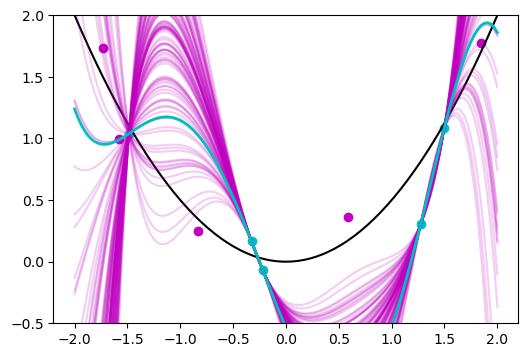

In [13]:
fig=plt.figure(0, (6, 4))
plt.plot(all_x, all_y, c='k')
plt.scatter(x_train, y_train, c='c')
plt.scatter(x_test, y_test, c='m')
plt.ylim([-0.5, 2])

plt.plot(all_x, all_fits.T, c='m', alpha=0.2);

plt.plot(all_x, all_y_fit, color='c', linewidth=2)

- Ok, I feel like this can work?
- What's the legendr fit tho? Does it kinda vibe da rest?
- Ok it's a bit of an outlier, but mayabe that's ok?
- Ok yeah for the legendre fit and a really big on, let me find the coefficients next!

In [14]:
all_y_fit.shape, all_fits.shape

((128,), (100, 128))

In [15]:
np.argmin(np.sum((all_fits-all_y_fit**2), 1))

85

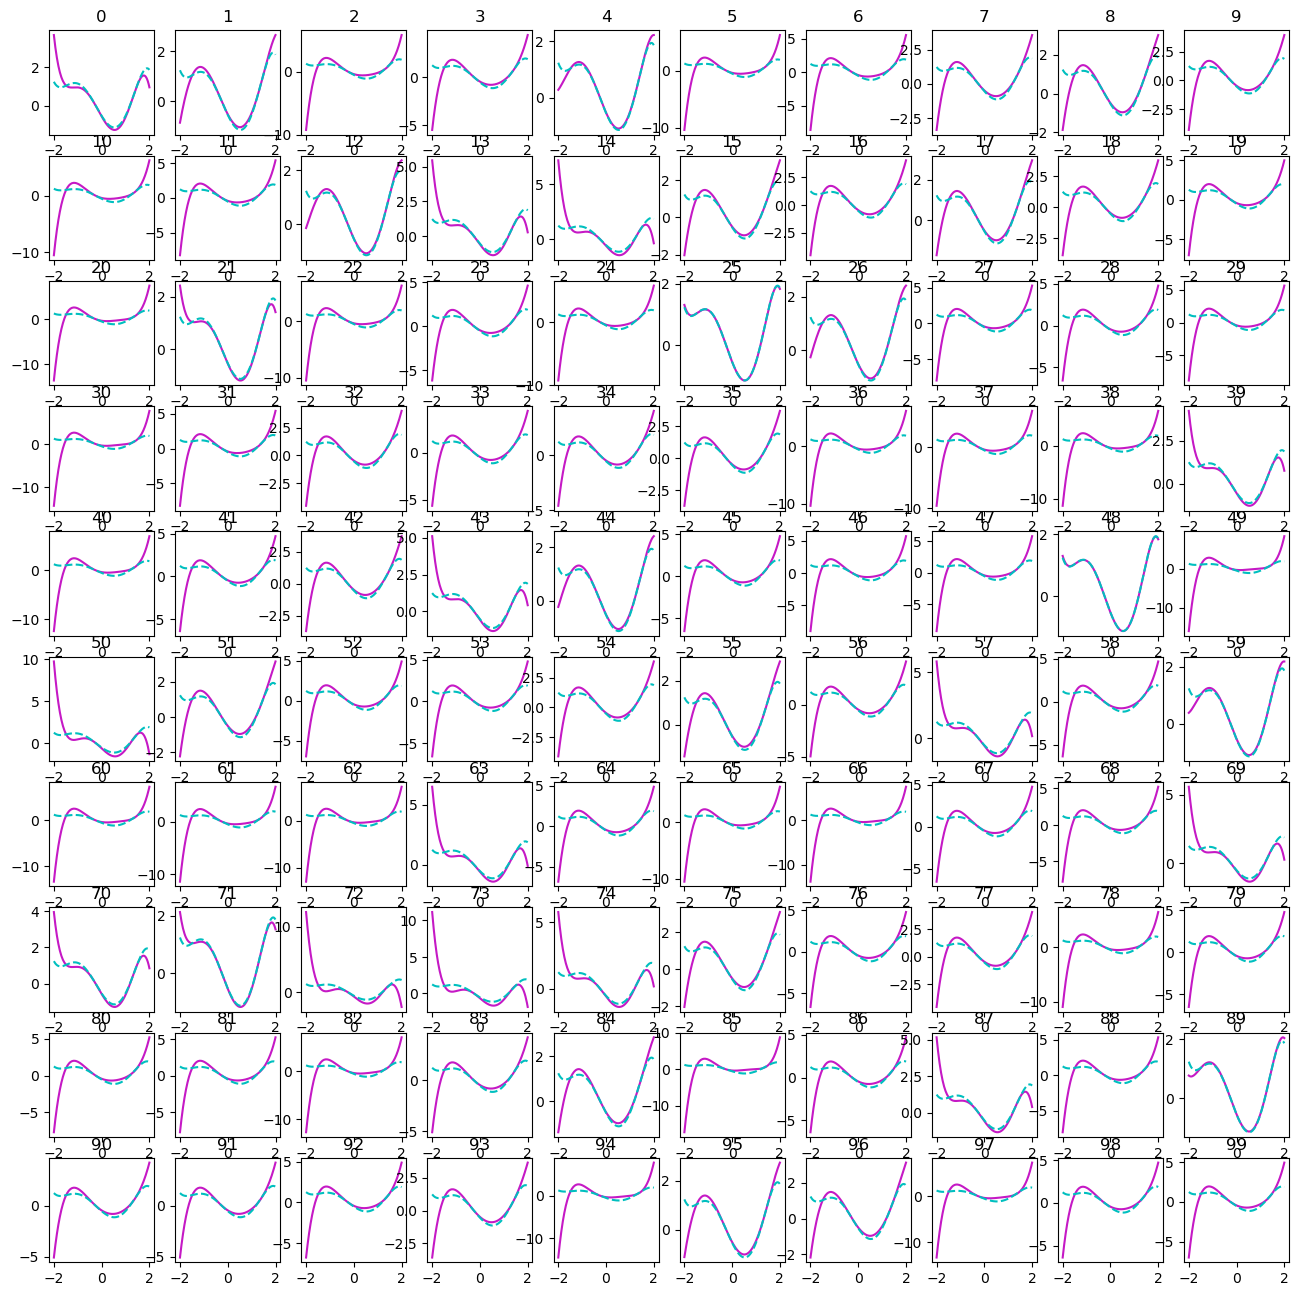

In [17]:
fig=plt.figure(0, (16, 16))
for i in range(100):
    fig.add_subplot(10,10,i+1)
    plt.plot(all_x, all_fits[i, :].T, c='m', alpha=0.9);
    
    plt.plot(all_x, all_y_fit, 'c--')
    plt.title(str(i))

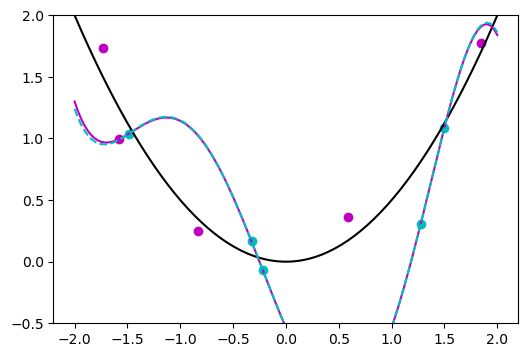

In [18]:
fig=plt.figure(0, (6, 4))
plt.plot(all_x, all_y, c='k')
plt.scatter(x_train, y_train, c='c')
plt.scatter(x_test, y_test, c='m')
plt.ylim([-0.5, 2])

plt.plot(all_x, all_fits[48], c='m', alpha=1.0);

plt.plot(all_x, all_y_fit, 'c--')

- Ok nice yep very close.
- Ok now let me pick a wild looking one too and compare their coefficients. 

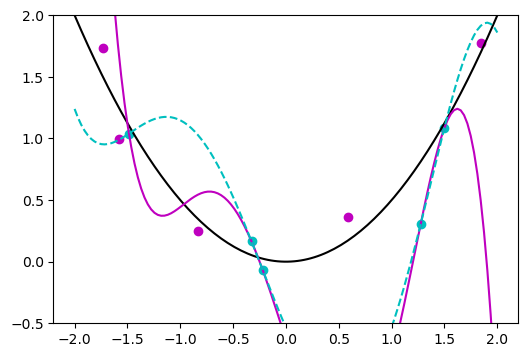

In [23]:
fig=plt.figure(0, (6, 4))
plt.plot(all_x, all_y, c='k')
plt.scatter(x_train, y_train, c='c')
plt.scatter(x_test, y_test, c='m')
plt.ylim([-0.5, 2])

plt.plot(all_x, all_fits[50], c='m', alpha=1.0);

plt.plot(all_x, all_y_fit, 'c--')

In [48]:
all_coeffs[48]

array([-0.5370232 , -1.9890692 ,  0.9468571 ,  1.3580599 , -0.10506456,
       -0.2067696 ], dtype=float32)

In [ ]:
0.54^2+1.99^2+0.95^2+1.36^2+1.11^2+0.01^2


In [25]:
all_coeffs[50]

array([-0.63459975, -2.657305  ,  0.20649   ,  2.7255857 ,  0.25141862,
       -0.6883911 ], dtype=float32)

In [30]:
np.sum(all_coeffs[48]**2)

7.0394473

In [31]:
np.sum(all_coeffs[60]**2)

7.7497864

In [37]:
np.argmax(np.sum(np.array(all_coeffs)**2, axis=1))

72

In [38]:
all_coeffs[72]

array([-0.66291153, -2.85132   , -0.00847043,  3.1226988 ,  0.35495326,
       -0.8282183 ], dtype=float32)

In [39]:
np.sum(all_coeffs[72]**2)

19.132734

(-0.5, 2.0)

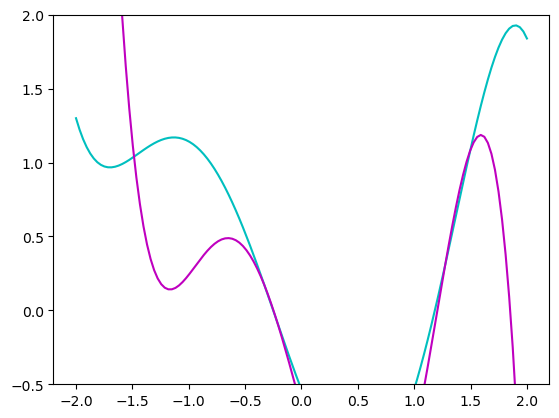

In [43]:
y_fit_crazy = polyval_torch_coeffs(all_coeffs[72], all_x)
y_fit_chill = polyval_torch_coeffs(all_coeffs[48], all_x)
plt.plot(all_x, y_fit_chill, c='c', alpha=1.0);
plt.plot(all_x, y_fit_crazy, c='m', alpha=1.0);
plt.ylim([-0.5, 2])

Ok got it, let's get picklin

In [47]:
np.save('/Users/stephen/Stephencwelch Dropbox/welch_labs/double_descent/graphics/all_fits_oct_13_1', all_fits)
np.save('/Users/stephen/Stephencwelch Dropbox/welch_labs/double_descent/graphics/all_coefs_oct_13_1', all_coeffs)

### Multiple Solutions - degree 10

In [49]:
degree = 10
n_inits = 100

# Store results
all_coeffs = []
all_fits=[]
train_errors = []
test_errors = []
colors = cm.tab10(np.linspace(0, 1, n_inits))

print(f"\nFitting degree {degree} polynomial with gradient descent:")
print(f"Training points: {n_train_points}, Parameters: {degree + 1}\n")

for i in tqdm(range(n_inits)):
    # print(f"Initialization {i+1}:")
    
    # Fit with different random initialization
    coeffs = fit_polynomial_gd(
        x_train_tensor, y_train_tensor, 
        degree, 
        lr=0.001, 
        steps=30000,
        init_scale=1.0,
        seed=i
    )
    
    # Plot the fit
    y_fit = polyval_torch_coeffs(coeffs, all_x)
   
    # Calculate errors
    y_train_pred = polyval_torch_coeffs(coeffs, x_train)
    y_test_pred = polyval_torch_coeffs(coeffs, x_test)
    
    train_error = np.mean((y_train - y_train_pred)**2)
    test_error = np.mean((y_test - y_test_pred)**2)

    if np.abs(train_error)< 0.001:
        train_errors.append(train_error)
        test_errors.append(test_error)
        all_fits.append(y_fit)
        all_coeffs.append(coeffs)
    else:
        print('Nah bro, ', str(train_error))
    
    # print(f"  Final train error: {train_error:.6f}, test error: {test_error:.6f}\n")

all_fits=np.array(all_fits)
all_coeffs=np.array(all_coeffs)


Fitting degree 10 polynomial with gradient descent:
Training points: 5, Parameters: 11



100%|█████████████████████████████████████████████████████████| 100/100 [04:21<00:00,  2.62s/it]


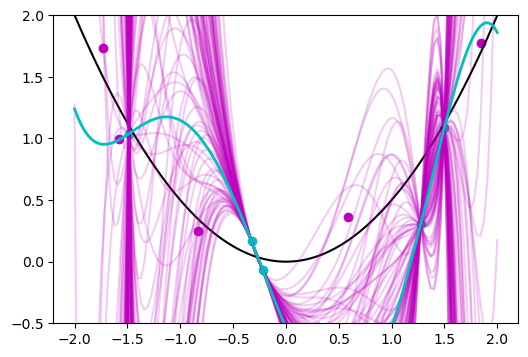

In [50]:
fig=plt.figure(0, (6, 4))
plt.plot(all_x, all_y, c='k')
plt.scatter(x_train, y_train, c='c')
plt.scatter(x_test, y_test, c='m')
plt.ylim([-0.5, 2])

plt.plot(all_x, all_fits.T, c='m', alpha=0.2);

plt.plot(all_x, all_y_fit, color='c', linewidth=2)

- So, for the animation, I'll want to know which index has the largest error and what the error is...

In [51]:
np.argmax(test_errors)

66

In [52]:
np.save('/Users/stephen/Stephencwelch Dropbox/welch_labs/double_descent/graphics/all_fits_degree_10_oct_13_1', all_fits)

In [53]:
test_errors[66]

12807.838115275572

## Bias Variance Computation
- Ok i think we jump up to 15 training points here to show more of the classical trade-off
- Ok there's some important middle details to fill in, but bias/variance calculation is the sketchiest thing right now I think
- Let me get a bit deeper into this
- yeah let me see what the key parts of p66-p68 look like

In [10]:
random_seed=428
n_points=10
noise_level=0.2

all_x = np.linspace(-2, 2, 128)
all_y = f(all_x)

n_train_points=int(np.floor(n_points*0.5))
n_test_points=n_points-n_train_points
x,y=get_noisy_data(n_points, noise_level, random_seed)
                   
x_train=x[:n_train_points]
y_train=y[:n_train_points]
x_test=x[n_train_points:]
y_test=y[n_train_points:]

0.4135909798073566 0.359524153994523


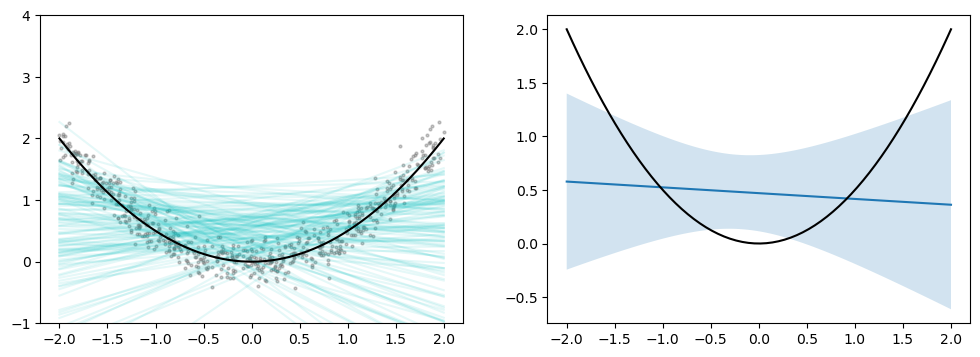

In [11]:
degree=1
fits=[]
y_trains=[]; x_trains=[]
for i in range(128):
    x,y=get_noisy_data(n_points, noise_level, random_seed=i)            
    x_train, y_train=x[:n_train_points], y[:n_train_points]
    x_test, y_test=x[n_train_points:], y[n_train_points:]
    x_trains.append(x_train); y_trains.append(y_train)

    beta_hat = fit_legendre_pinv(x_train, y_train, degree)
    all_y_fit = eval_legendre_poly(beta_hat, all_x, degree)
    fits.append(all_y_fit)
fits=np.array(fits); x_trains=np.array(x_trains); y_trains=np.array(y_trains)

fig=plt.figure(0, (12, 4))
ax=fig.add_subplot(1,2,1)
plt.scatter(x_trains.ravel(), y_trains.ravel(), c='#777777', alpha=0.4, s=4)
plt.plot(all_x, fits.T, color='c', label=f'Degree {degree}', alpha=0.1);
plt.plot(all_x, all_y, c='k')
plt.ylim([-1, 4])

ax=fig.add_subplot(1,2,2)
mean_fit=np.mean(fits, 0)
std_fit=np.std(fits, 0)

plt.plot(all_x, mean_fit)
plt.plot(all_x, all_y, c='k')
plt.fill_between(all_x, 
                 mean_fit - std_fit, 
                 mean_fit + std_fit, 
                 alpha=0.2)

mean_fit=np.mean(fits, 0)
bias=np.mean((all_y-mean_fit)**2)
variance=np.mean((fits-mean_fit)**2) 
print(bias, variance)

0.009612643197867882 1.3811419043823225


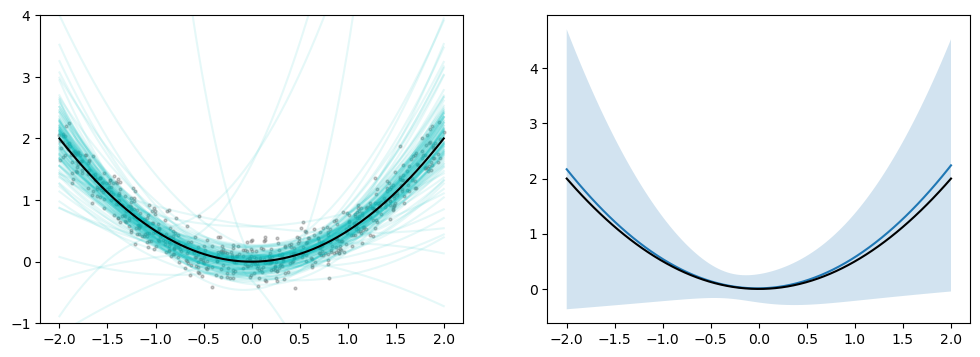

In [12]:
degree=2
fits=[]
y_trains=[]; x_trains=[]
for i in range(128):
    x,y=get_noisy_data(n_points, noise_level, random_seed=i)            
    x_train, y_train=x[:n_train_points], y[:n_train_points]
    x_test, y_test=x[n_train_points:], y[n_train_points:]
    x_trains.append(x_train); y_trains.append(y_train)

    beta_hat = fit_legendre_pinv(x_train, y_train, degree)
    all_y_fit = eval_legendre_poly(beta_hat, all_x, degree)
    fits.append(all_y_fit)
fits=np.array(fits); x_trains=np.array(x_trains); y_trains=np.array(y_trains)

fig=plt.figure(0, (12, 4))
ax=fig.add_subplot(1,2,1)
plt.scatter(x_trains.ravel(), y_trains.ravel(), c='#777777', alpha=0.4, s=4)
plt.plot(all_x, fits.T, color='c', label=f'Degree {degree}', alpha=0.1);
plt.plot(all_x, all_y, c='k')
plt.ylim([-1, 4])

ax=fig.add_subplot(1,2,2)
mean_fit=np.mean(fits, 0)
std_fit=np.std(fits, 0)

fig=plt.figure(0, (6, 4))
plt.plot(all_x, mean_fit)
plt.plot(all_x, all_y, c='k')
plt.fill_between(all_x, 
                 mean_fit - std_fit, 
                 mean_fit + std_fit, 
                 alpha=0.2)
mean_fit=np.mean(fits, 0)
bias=np.mean((all_y-mean_fit)**2)
variance=np.mean((fits-mean_fit)**2) 
print(bias, variance)

100%|█████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 27437.06it/s]


0.37664826762375175 349.29185525792377


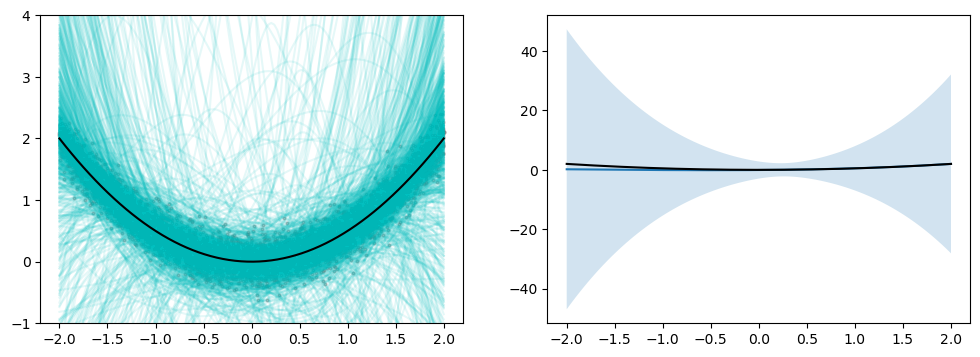

In [13]:
degree=3
fits=[]
y_trains=[]; x_trains=[]
for i in tqdm(range(1000)):
    x,y=get_noisy_data(n_points, noise_level, random_seed=i)            
    x_train, y_train=x[:n_train_points], y[:n_train_points]
    x_test, y_test=x[n_train_points:], y[n_train_points:]
    x_trains.append(x_train); y_trains.append(y_train)

    beta_hat = fit_legendre_pinv(x_train, y_train, degree)
    all_y_fit = eval_legendre_poly(beta_hat, all_x, degree)
    fits.append(all_y_fit)
fits=np.array(fits); x_trains=np.array(x_trains); y_trains=np.array(y_trains)

fig=plt.figure(0, (12, 4))
ax=fig.add_subplot(1,2,1)
plt.scatter(x_trains.ravel(), y_trains.ravel(), c='#777777', alpha=0.4, s=4)
plt.plot(all_x, fits.T, color='c', label=f'Degree {degree}', alpha=0.1);
plt.plot(all_x, all_y, c='k')
plt.ylim([-1, 4])

ax=fig.add_subplot(1,2,2)
mean_fit=np.mean(fits, 0)
std_fit=np.std(fits, 0)

plt.plot(all_x, mean_fit)
plt.plot(all_x, all_y, c='k')
plt.fill_between(all_x, 
                 mean_fit - std_fit, 
                 mean_fit + std_fit, 
                 alpha=0.2)
mean_fit=np.mean(fits, 0)
bias=np.mean((all_y-mean_fit)**2)
variance=np.mean((fits-mean_fit)**2) 
print(bias, variance)

In [14]:
(fits-mean_fit).shape

(1000, 128)

11833.471348988187 7224443.446578367


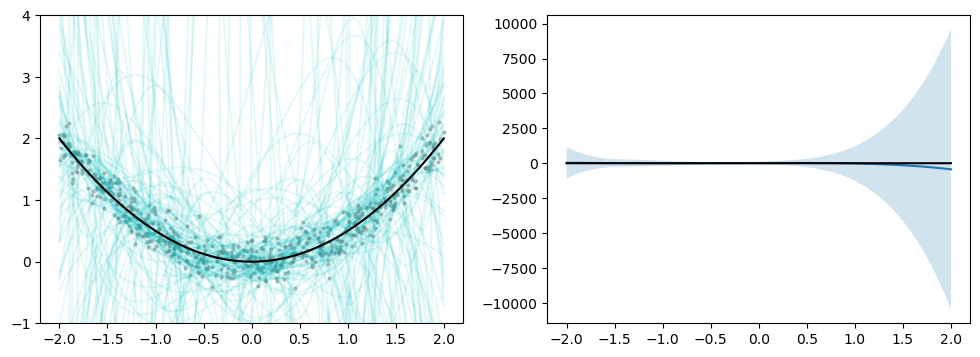

In [15]:
degree=4
fits=[]
y_trains=[]; x_trains=[]
for i in range(128):
    x,y=get_noisy_data(n_points, noise_level, random_seed=i)            
    x_train, y_train=x[:n_train_points], y[:n_train_points]
    x_test, y_test=x[n_train_points:], y[n_train_points:]
    x_trains.append(x_train); y_trains.append(y_train)

    beta_hat = fit_legendre_pinv(x_train, y_train, degree)
    all_y_fit = eval_legendre_poly(beta_hat, all_x, degree)
    fits.append(all_y_fit)
fits=np.array(fits); x_trains=np.array(x_trains); y_trains=np.array(y_trains)

fig=plt.figure(0, (12, 4))
ax=fig.add_subplot(1,2,1)
plt.scatter(x_trains.ravel(), y_trains.ravel(), c='#777777', alpha=0.4, s=4)
plt.plot(all_x, fits.T, color='c', label=f'Degree {degree}', alpha=0.1);
plt.plot(all_x, all_y, c='k')
plt.ylim([-1, 4])

ax=fig.add_subplot(1,2,2)
mean_fit=np.mean(fits, 0)
std_fit=np.std(fits, 0)

plt.plot(all_x, mean_fit)
plt.plot(all_x, all_y, c='k')
plt.fill_between(all_x, 
                 mean_fit - std_fit, 
                 mean_fit + std_fit, 
                 alpha=0.2)
mean_fit=np.mean(fits, 0)
bias=np.mean((all_y-mean_fit)**2)
variance=np.mean((fits-mean_fit)**2) 
print(bias, variance)

100%|████████████████████████████████████████████████████████████| 49/49 [00:10<00:00,  4.74it/s]


<Figure size 640x480 with 0 Axes>

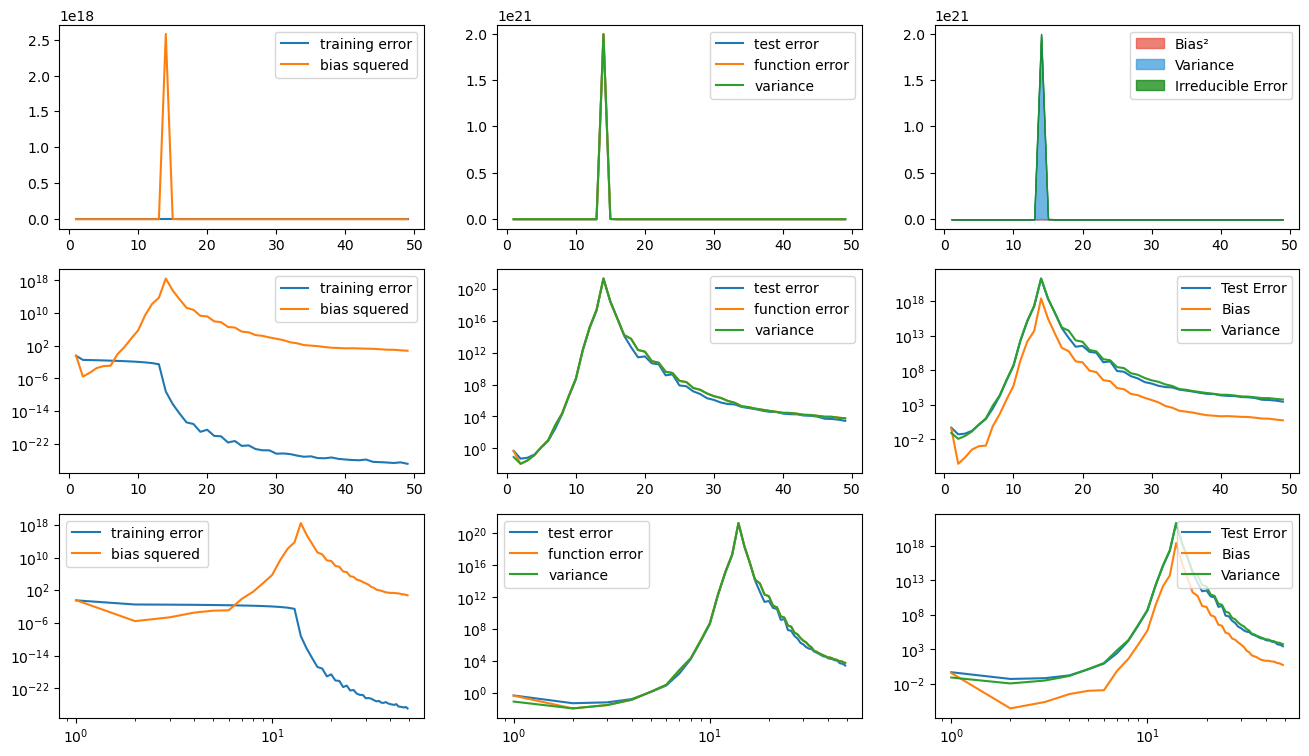

In [16]:
random_seed=428
n_points=30
noise_level=0.2

n_random_samples=1024
degrees=np.arange(1, 50)

n_train_points=int(np.floor(n_points*0.5))
n_test_points=n_points-n_train_points

biases=[]
variances=[]
average_train_error=[]
average_test_error=[]
average_function_error=[]
for degree in tqdm(degrees):
    
    fits=[]
    train_errors=[]
    test_errors=[]
    function_errors=[]
    for i in range(n_random_samples):
        x,y=get_noisy_data(n_points, noise_level, random_seed=i)            
        x_train, y_train=x[:n_train_points], y[:n_train_points]
        x_test, y_test=x[n_train_points:], y[n_train_points:]
    
        beta_hat = fit_legendre_pinv(x_train, y_train, degree)
        all_y_fit = eval_legendre_poly(beta_hat, all_x, degree)
        y_train_pred = eval_legendre_poly(beta_hat, x_train, degree)
        y_test_pred = eval_legendre_poly(beta_hat, x_test, degree)

        train_error = np.mean((y_train - y_train_pred)**2)
        test_error = np.mean((y_test - y_test_pred)**2)
        function_error = np.mean((all_y-all_y_fit)**2)
                
        fits.append(all_y_fit)
        train_errors.append(train_error)
        test_errors.append(test_error)
        function_errors.append(function_error)
        
    fits=np.array(fits)
    
    mean_fit=np.mean(fits, 0)
    bias=np.mean((all_y-mean_fit)**2)
    variance=np.mean((fits-mean_fit)**2) 
    # print(degree, bias, variance)
    average_train_error.append(np.mean(train_errors))
    average_test_error.append(np.mean(test_errors))
    average_function_error.append(np.mean(function_errors))

    biases.append(bias)
    variances.append(variance)
    
biases=np.array(biases)
variances=np.array(variances)
average_function_error=np.array(average_function_error)

plt.clf()
fig=plt.figure(0, (16, 9))
fig.add_subplot(3,3,1)
plt.plot(degrees, average_train_error)
plt.plot(degrees, biases)
plt.legend(['training error', 'bias squered'])

fig.add_subplot(3,3,2)
plt.plot(degrees, average_test_error)
plt.plot(degrees, average_function_error)
plt.plot(degrees, variances)
plt.legend(['test error', 'function error', 'variance'])

ax3=fig.add_subplot(3,3,3)
irreducible_error = average_test_error - (biases + variances)
ax3.fill_between(degrees, 0, biases, alpha=0.7, label='Bias²', color='#e74c3c')
ax3.fill_between(degrees, biases, biases + variances, alpha=0.7, label='Variance', color='#3498db')
ax3.fill_between(degrees, biases + variances, average_test_error, alpha=0.7, 
                 label='Irreducible Error', color='green')
ax3.legend(loc='upper right')

ax4=fig.add_subplot(3,3,4)
ax4.plot(degrees, average_train_error)
ax4.plot(degrees, biases)
ax4.legend(['training error', 'bias squered'])
ax4.set_yscale('log')

ax5=fig.add_subplot(3,3,5)
ax5.plot(degrees, average_test_error)
ax5.plot(degrees, average_function_error)
ax5.plot(degrees, variances)
ax5.legend(['test error', 'function error', 'variance'])
ax5.set_yscale('log')

ax6=fig.add_subplot(3,3,6)
ax6.plot(degrees, average_test_error, label='Test Error')
ax6.plot(degrees, biases, label='Bias')
ax6.plot(degrees, variances, label='Variance')
# ax6.fill_between(degrees, 0, biases, alpha=0.7, label='Bias²', color='#e74c3c')
# ax6.fill_between(degrees, biases, biases + variances, alpha=0.7, label='Variance', color='#3498db')
# ax6.fill_between(degrees, biases + variances, average_test_error, alpha=0.7, 
#                  label='Irreducible Error', color='green')
ax6.set_yscale('log')
ax6.legend(loc='upper right')

ax7=fig.add_subplot(3,3,7)
ax7.plot(degrees, average_train_error)
ax7.plot(degrees, biases)
ax7.legend(['training error', 'bias squered'])
ax7.set_yscale('log')
ax7.set_xscale('log')

ax8=fig.add_subplot(3,3,8)
ax8.plot(degrees, average_test_error)
ax8.plot(degrees, average_function_error)
ax8.plot(degrees, variances)
ax8.legend(['test error', 'function error', 'variance'])
ax8.set_yscale('log')
ax8.set_xscale('log')


ax9=fig.add_subplot(3,3,9)
ax9.plot(degrees, average_test_error, label='Test Error')
ax9.plot(degrees, biases, label='Bias')
ax9.plot(degrees, variances, label='Variance')
# ax9.fill_between(degrees, 0, biases, alpha=0.7, label='Bias²', color='#e74c3c')
# ax9.fill_between(degrees, biases, biases + variances, alpha=0.7, label='Variance', color='#3498db')
# ax9.fill_between(degrees, biases + variances, average_test_error, alpha=0.7, 
#                  label='Irreducible Error', color='green')
ax9.set_yscale('log')
ax9.legend(loc='upper right')
ax9.set_xscale('log')

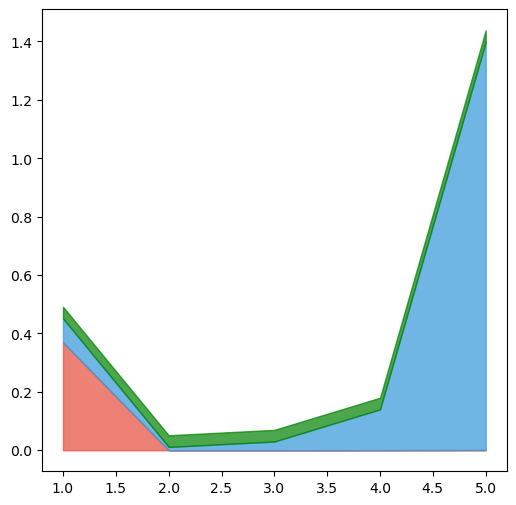

In [17]:
fig=plt.figure(0, (6,6))
ax=fig.add_subplot(111)
max_x=5
ax.fill_between(degrees[:max_x], 0, biases[:max_x], alpha=0.7, label='Bias²', color='#e74c3c')
ax.fill_between(degrees[:max_x], biases[:max_x], biases[:max_x] + variances[:max_x], alpha=0.7, label='Variance', color='#3498db')
# ax.fill_between(degrees[:max_x], biases[:max_x] + variances[:max_x], average_test_error[:max_x], alpha=0.7, 
#                  label='Irreducible Error', color='green')
ax.fill_between(degrees[:max_x], biases[:max_x] + variances[:max_x],  biases[:max_x] + variances[:max_x]+noise_level**2, alpha=0.7, 
                 label='Irreducible Error', color='green')

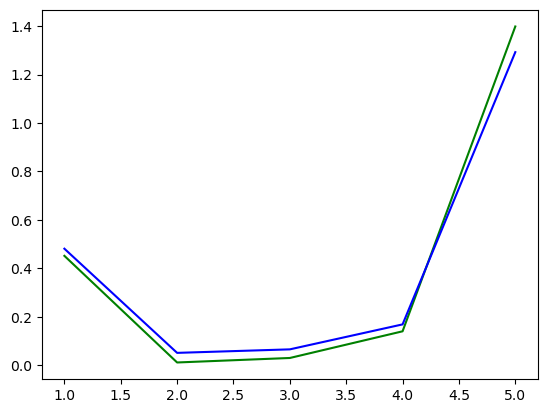

In [18]:
plt.plot(degrees[:5], biases[:5]+variances[:5], 'g')
plt.plot(degrees[:5], average_test_error[:5], 'b')

In [19]:
average_test_error[:5]-(biases[:5]+variances[:5])

array([ 0.02947087,  0.03967169,  0.03558172,  0.02852895, -0.10594099])

In [20]:
noise_level**2

0.04000000000000001

- So this decomposition works out until we get into the higer variance region
- I think becuase I'm measuring test set error on varoius random draws, and bias and variance densly
- Ok, so let's try this then:

In [21]:
irreducible_error=noise_level**2
total_est_error=biases+variances+irreducible_error
variance_frac=variances/total_est_error
bias_frac=biases/total_est_error
irr_frac=irreducible_error/total_est_error

for i in range(len(biases)):
    print(degrees[i], bias_frac[i], variance_frac[i], irr_frac[i], bias_frac[i]+variance_frac[i]+irr_frac[i])

1 0.7516888570679495 0.16694304599299184 0.08136809693905862 1.0
2 5.299353805519721e-05 0.22179876016999267 0.7781482462919521 1.0
3 0.00033254559351354306 0.4280468185844331 0.5716206358220532 0.9999999999999999
4 0.001811816637836411 0.7760970152498451 0.22209116811231847 0.9999999999999999
5 0.0006828699312330699 0.9715085161488243 0.027808613919942646 1.0
6 0.0001134316170577245 0.9960728676610571 0.003813700721885327 1.0
7 0.0010245650779668939 0.9989212572517906 5.417767024257684e-05 1.0
8 0.0018993176566277467 0.9980989101751248 1.7721682474528616e-06 1.0
9 0.0013588001408601895 0.9986411901607913 9.69834853788462e-09 1.0
10 0.001003096912374719 0.9989969030133752 7.425022601419361e-11 1.0000000000000002
11 0.0011862615019181963 0.9988137384980632 1.863694223465104e-14 1.0
12 0.0009562080337642013 0.9990437919662358 2.653704459207615e-17 1.0
13 0.0002177346807834337 0.9997822653192165 1.6972683215287472e-19 1.0
14 0.0012911083173636538 0.9987088916826363 2.0019675058284308e-23 

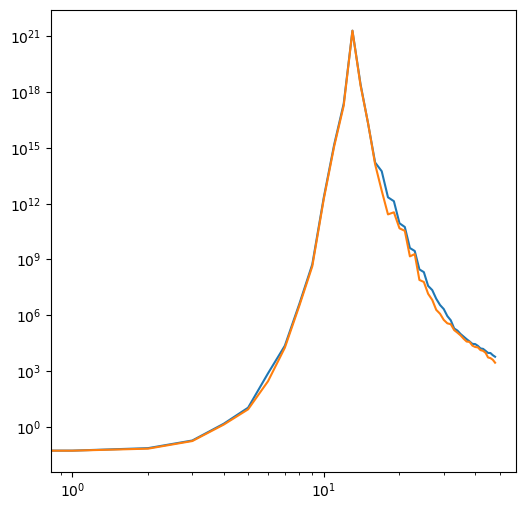

In [22]:
#not the most rigorous test, but these do track pretty well (log scale tho)
fig=plt.figure(0, (6,6))
ax=fig.add_subplot(111)
plt.plot(total_est_error)
plt.plot(average_test_error)
ax.set_yscale('log')
ax.set_xscale('log')

In [23]:
log_total_est_error=np.log10(total_est_error)
log_total_est_error-=np.min(log_total_est_error) #make minimum 0 for scaling, kinda janky

# bias_frac[i], variance_frac[i], irr_frac[i]

In [24]:
bias_line=log_total_est_error*bias_frac
variance_line=log_total_est_error*variance_frac
irr_line=log_total_est_error*irr_frac

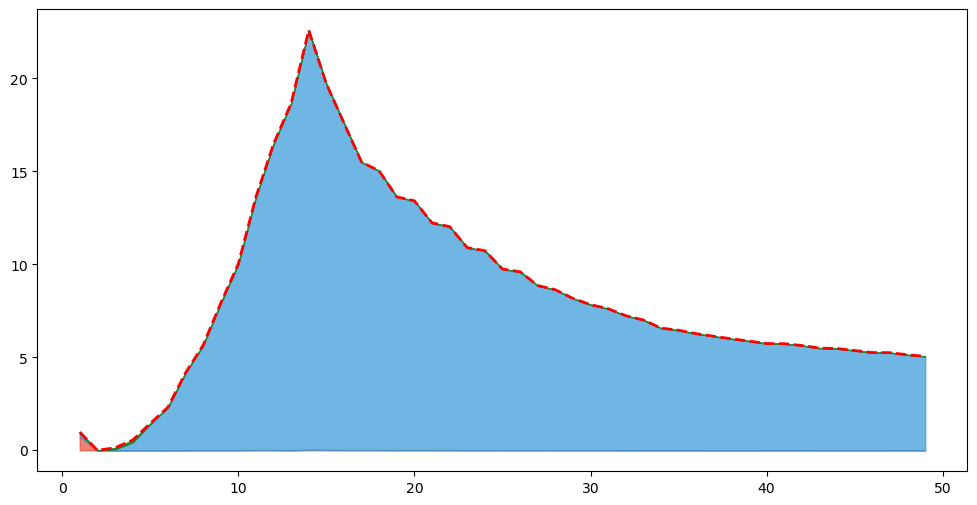

In [25]:
fig=plt.figure(0, (12,6))
ax=fig.add_subplot(111)
plt.plot(degrees, log_total_est_error, 'r--', linewidth=2)
ax.fill_between(degrees, 0, bias_line, alpha=0.7, label='Bias²', color='#e74c3c')
ax.fill_between(degrees, bias_line, bias_line+variance_line, alpha=0.7, label='Variance', color='#3498db')
ax.fill_between(degrees, bias_line+variance_line, log_total_est_error, alpha=0.7, 
                 label='Irreducible Error', color='green')

# ax.set_xscale('log') #50/50 on log here

(0.0, 2.0)

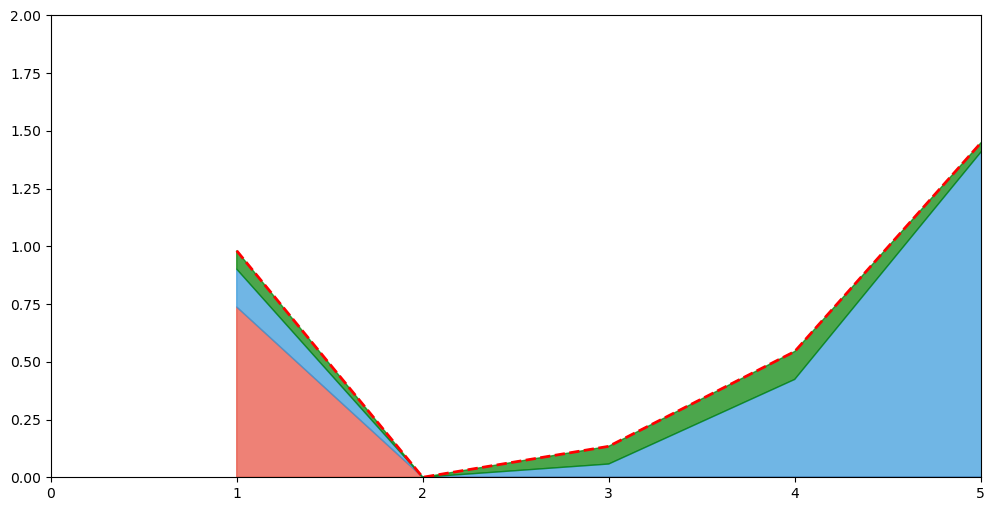

In [26]:
fig=plt.figure(0, (12,6))
ax=fig.add_subplot(111)
plt.plot(degrees, log_total_est_error, 'r--', linewidth=2)
ax.fill_between(degrees, 0, bias_line, alpha=0.7, label='Bias²', color='#e74c3c')
ax.fill_between(degrees, bias_line, bias_line+variance_line, alpha=0.7, label='Variance', color='#3498db')
ax.fill_between(degrees, bias_line+variance_line, log_total_est_error, alpha=0.7, 
                 label='Irreducible Error', color='green')
plt.xlim([0, 5])
plt.ylim([0, 2])
# ax.set_xscale('log') #50/50 on log here

In [27]:
log_total_est_error

array([ 0.98060818,  0.        ,  0.13395444,  0.54453105,  1.446883  ,
        2.30971573,  4.15724202,  5.64255739,  7.90436456, 10.02036456,
       13.62068768, 16.46720979, 18.66131184, 22.58960532, 19.71159558,
       17.59797004, 15.49915705, 15.02722473, 13.62706086, 13.41768478,
       12.23062774, 12.02996093, 10.89855118, 10.73816055,  9.7497398 ,
        9.60106272,  8.86093276,  8.63556307,  8.16948469,  7.83168936,
        7.61468697,  7.237731  ,  7.00776988,  6.57033877,  6.45728723,
        6.27233109,  6.13215979,  5.99410475,  5.87403392,  5.74185512,
        5.73119654,  5.6359323 ,  5.49692825,  5.4733292 ,  5.36611704,
        5.2554696 ,  5.25060128,  5.13382691,  5.0500571 ])

In [28]:
np.min(log_total_est_error)

0.0

In [29]:
bias2 + var

NameError: name 'bias2' is not defined

In [ ]:
# for i in range(len(biases)):
#     print(degrees[i], biases[i], variances[i], average_test_error[i])

In [ ]:
irreducible_error

Man keep running into wierdness today, why is my bias+variance bigger than my test error?

In [ ]:
# irreducible_error=average_test_error-variances-bias

In [ ]:
# irreducible_error

In [ ]:
# irreducible_error=average_test_error-variances-bias
# variance_frac=variances/average_test_error
# bias_frac=biases/average_test_error
# irr_frac=irreducible_error/average_test_error

# for i in range(len(biases)):
#     print(i, bias_frac[i], variance_frac[i], irr_frac[i], bias_frac[i]+variance_frac[i]+irr_frac[i])

In [ ]:
plt.plot(degrees, np.log10(average_test_error))

In [ ]:
fig=plt.figure(0, (6,6))
ax=fig.add_subplot(111)
ax.fill_between(degrees, 0, biases, alpha=0.7, label='Bias²', color='#e74c3c')
ax.fill_between(degrees, biases, biases + variances, alpha=0.7, label='Variance', color='#3498db')
ax.fill_between(degrees, biases + variances, average_test_error, alpha=0.7, 
                 label='Irreducible Error', color='green')
plt.ylim([0,5])
plt.xlim([0,5])

AH FUCK THE LOG VERTICAL PLOT MAKES THE STACKED AREAS MISLEADING I THICK -> FUUUUUCK. 

In [ ]:
for i in range(len(biases)):
    print(degrees[i], biases[i], variances[i])

In [ ]:
x_train.shape

In [ ]:
# save_dir='/Users/stephen/Stephencwelch Dropbox/welch_labs/double_descent/hackin/bias_variance_curves_4'

# #Once I have a nice vis approach, premute and viz these I think!
# for noise_level in [0.0, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0]:
#     for n_points in [8, 10, 12, 14, 16, 20, 30, 40, 50, 60, 100, 200]:

# # n_points=100
#         n_random_samples=2000
#         degrees=np.arange(1, 50)
        
#         biases=[]
#         variances=[]
#         average_train_error=[]
#         average_test_error=[]
#         average_function_error=[]
#         for degree in tqdm(degrees):
#             n_train_points=int(np.floor(n_points*0.5))
#             n_test_points=n_points-n_train_points
            
#             fits=[]
#             train_errors=[]
#             test_errors=[]
#             function_errors=[]
#             for i in range(n_random_samples):
#                 x,y=get_noisy_data(n_points, noise_level, random_seed=i)            
#                 x_train, y_train=x[:n_train_points], y[:n_train_points]
#                 x_test, y_test=x[n_train_points:], y[n_train_points:]
            
#                 beta_hat = fit_legendre_pinv(x_train, y_train, degree)
#                 all_y_fit = eval_legendre_poly(beta_hat, all_x, degree)
#                 y_train_pred = eval_legendre_poly(beta_hat, x_train, degree)
#                 y_test_pred = eval_legendre_poly(beta_hat, x_test, degree)
        
#                 train_error = np.mean((y_train - y_train_pred)**2)
#                 test_error = np.mean((y_test - y_test_pred)**2)
#                 function_error = np.mean((all_y-all_y_fit)**2)
                        
#                 fits.append(all_y_fit)
#                 train_errors.append(train_error)
#                 test_errors.append(test_error)
#                 function_errors.append(function_error)
                
#             fits=np.array(fits)
            
#             mean_fit=np.mean(fits, 0)
#             bias=np.mean((all_y-mean_fit)**2)
#             variance=np.mean((fits-mean_fit)**2) 
#             # print(degree, bias, variance)
#             average_train_error.append(np.mean(train_errors))
#             average_test_error.append(np.mean(test_errors))
#             average_function_error.append(np.mean(function_errors))
        
#             biases.append(bias)
#             variances.append(variance)
            
#         biases=np.array(biases)
#         variances=np.array(variances)
#         average_function_error=np.array(average_function_error)
        
#         plt.clf()
#         fig=plt.figure(0, (16, 9))
#         fig.add_subplot(3,3,1)
#         plt.plot(degrees, average_train_error)
#         plt.plot(degrees, biases)
#         plt.legend(['training error', 'bias squered'])
        
#         fig.add_subplot(3,3,2)
#         plt.plot(degrees, average_test_error)
#         plt.plot(degrees, average_function_error)
#         plt.plot(degrees, variances)
#         plt.legend(['test error', 'function error', 'variance'])
        
#         ax3=fig.add_subplot(3,3,3)
#         irreducible_error = average_test_error - (biases + variances)
#         ax3.fill_between(degrees, 0, biases, alpha=0.7, label='Bias²', color='#e74c3c')
#         ax3.fill_between(degrees, biases, biases + variances, alpha=0.7, label='Variance', color='#3498db')
#         ax3.fill_between(degrees, biases + variances, average_test_error, alpha=0.7, 
#                          label='Irreducible Error', color='green')
#         ax3.legend(loc='upper right')
        
#         ax4=fig.add_subplot(3,3,4)
#         ax4.plot(degrees, average_train_error)
#         ax4.plot(degrees, biases)
#         ax4.legend(['training error', 'bias squered'])
#         ax4.set_yscale('log')
        
#         ax5=fig.add_subplot(3,3,5)
#         ax5.plot(degrees, average_test_error)
#         ax5.plot(degrees, average_function_error)
#         ax5.plot(degrees, variances)
#         ax5.legend(['test error', 'function error', 'variance'])
#         ax5.set_yscale('log')
        
#         ax6=fig.add_subplot(3,3,6)
#         ax6.fill_between(degrees, 0, biases, alpha=0.7, label='Bias²', color='#e74c3c')
#         ax6.fill_between(degrees, biases, biases + variances, alpha=0.7, label='Variance', color='#3498db')
#         ax6.fill_between(degrees, biases + variances, average_test_error, alpha=0.7, 
#                          label='Irreducible Error', color='green')
#         ax6.set_yscale('log')
#         ax6.legend(loc='upper right')
        
#         ax7=fig.add_subplot(3,3,7)
#         ax7.plot(degrees, average_train_error)
#         ax7.plot(degrees, biases)
#         ax7.legend(['training error', 'bias squered'])
#         ax7.set_yscale('log')
#         ax7.set_xscale('log')
        
#         ax8=fig.add_subplot(3,3,8)
#         ax8.plot(degrees, average_test_error)
#         ax8.plot(degrees, average_function_error)
#         ax8.plot(degrees, variances)
#         ax8.legend(['test error', 'function error', 'variance'])
#         ax8.set_yscale('log')
#         ax8.set_xscale('log')
        
        
#         ax9=fig.add_subplot(3,3,9)
#         ax9.fill_between(degrees, 0, biases, alpha=0.7, label='Bias²', color='#e74c3c')
#         ax9.fill_between(degrees, biases, biases + variances, alpha=0.7, label='Variance', color='#3498db')
#         ax9.fill_between(degrees, biases + variances, average_test_error, alpha=0.7, 
#                          label='Irreducible Error', color='green')
#         ax9.set_yscale('log')
#         ax9.legend(loc='upper right')
#         ax9.set_xscale('log')

#         plt.savefig(save_dir+'/n_points_'+str(n_points)+'_noise_level_'+str(noise_level)+'.png')

- Ok this is tricky and hurting my head, but I do think this is a good thing to sort out first
- So the really powerful plot I would like to show here is:
- Real test error as a function of degree
- Compute bias as a shaded region
- Computed variance as a shaded region
- Irreucible error as a shaded region
- All of this across the interpolation treshold
- Clear bias/variance tradeoff in the classical region
- Bias and variance trending together after we hit interpolation threshold -> assuming this keeps happening
- This plot is kinda the final payoff of the video -> so if it's possible, it would be dope
- I think it's going to require more data points, which is fine!
- If I can get a nice final plot, I can decide how far I want to carry it forward -> like if i want to use the same exact data in the into, don't have to, I'll make a call after i figure this out
- Should consider log plots on one or both axes!
- And I trimmed plot like rylan does.
- Ok one more option too, i might get cleaner results if I meaasure not test set error, but the error betwee the fit and the underlying function at all points, ya know?

- Ok interesting, Rylan is not using noise at all it looks like, and comparing underlying functions got it!